This notebook shows the TensorFlow Lite model conversion and inference processes for the **MIRNet** model as proposed by [Learning Enriched Features for Real Image Restoration and Enhancement](https://arxiv.org/pdf/2003.06792v2.pdf). This model is capable of enhancing low-light images upto a great extent. 

<p align="center">
<img src="https://github.com/soumik12345/MIRNet/raw/master/assets/lol_results.gif"</img><br>
<small><a href="https://github.com/soumik12345/MIRNet/blob/master/assets/lol_results.gif">Source</a></small>
</p>

Access **Sayak's** notebooks  [here](https://github.com/sayakpaul/MIRNet-TFLite/). 

## Initial setup

In [1]:
!git clone https://github.com/soumik12345/MIRNet
%cd MIRNet

C:\Users\piyush.pathak\Downloads\low-light-image-enhancement-tutorial-main\low-light-image-enhancement\MIRNet


Cloning into 'MIRNet'...


In [2]:
!pip install -q wandb

Note: you may need to restart the kernel to use updated packages.


In [3]:
from glob import glob
from PIL import Image
from matplotlib import pyplot as plt
from mirnet.inference import Inferer
from mirnet.utils import download_dataset, plot_result

import tensorflow as tf
import numpy as np
print(tf.__version__)

2.3.1


## Download dataset and pre-trained weights

In [4]:
inferer = Inferer()
inferer.download_weights('1sUlRD5MTRKKGxtqyYDpTv7T3jOW6aVAL')
inferer.build_model(
    num_rrg=3, num_mrb=2, channels=64,
    weights_path='low_light_weights_best.h5'
)
inferer.model.summary()

Downloading...
From: https://drive.google.com/uc?id=1sUlRD5MTRKKGxtqyYDpTv7T3jOW6aVAL
To: C:\Users\piyush.pathak\Downloads\low-light-image-enhancement-tutorial-main\low-light-image-enhancement\MIRNet\low_light_weights_best.h5
148MB [00:47, 3.13MB/s] 


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 6 1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 6 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, None, None, 6 36928       conv2d_1[0][0]                   
_______________________________________________________________________________________

tf_op_layer_Mul_22 (TensorFlowO [(None, None, None,  0           add_24[0][0]                     
                                                                 tf_op_layer_Softmax_10[0][0]     
__________________________________________________________________________________________________
tf_op_layer_Mul_23 (TensorFlowO [(None, None, None,  0           add_24[0][0]                     
                                                                 tf_op_layer_Softmax_11[0][0]     
__________________________________________________________________________________________________
add_26 (Add)                    (None, None, None, 6 0           tf_op_layer_Mul_21[0][0]         
                                                                 tf_op_layer_Mul_22[0][0]         
                                                                 tf_op_layer_Mul_23[0][0]         
__________________________________________________________________________________________________
conv2d_106

concatenate_46 (Concatenate)    (None, None, None, 2 0           tf_op_layer_ExpandDims_46[0][0]  
                                                                 tf_op_layer_ExpandDims_47[0][0]  
__________________________________________________________________________________________________
tf_op_layer_Reshape_33 (TensorF [(None, 1, 1, 64)]   0           global_average_pooling2d_33[0][0]
__________________________________________________________________________________________________
conv2d_408 (Conv2D)             (None, 1, 1, 256)    8448        re_lu_62[0][0]                   
__________________________________________________________________________________________________
conv2d_409 (Conv2D)             (None, None, None, 1 3           concatenate_46[0][0]             
__________________________________________________________________________________________________
conv2d_357 (Conv2D)             (None, 1, 1, 8)      520         tf_op_layer_Reshape_33[0][0]     
__________

Total params: 36,351,613
Trainable params: 36,351,613
Non-trainable params: 0
__________________________________________________________________________________________________


In [5]:
inferer.model.save('mirnet')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: mirnet\assets


In [16]:
IMAGE_LOC = r'C:\Desktop\IMG_20190719_101051.jpg'

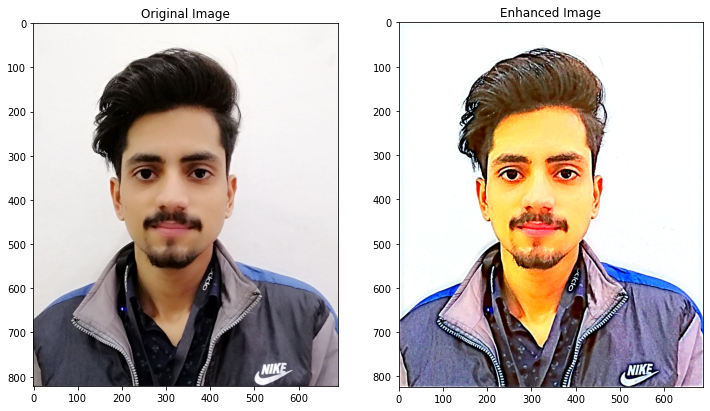

In [17]:
original_image, output_image = inferer.infer(IMAGE_LOC)
plot_result(original_image, output_image)